In [1]:
import numpy as np
import tensorflow as tf

In [2]:
data_file = '/data/robotics/raw_position_images/train_2_.tfrecords'
example = tf.train.Example()
pi = tf.python_io.tf_record_iterator(data_file)
example.ParseFromString(pi.next())


In [3]:
from operator import mul
col_sz = (480, 640, 3)
pnt_sz = (480, 640, 3)
cad_sz = (480, 640, 3)

col_dtype = np.uint8
dep_dtype = np.uint16
cad_dtype = np.uint8
pnt_dtype = np.float32

col_start = 0
col_end = reduce(mul, col_sz)
pnt_start = col_end
pnt_end = pnt_start + reduce(mul, pnt_sz)*4
cad_start = pnt_end

def from_buffer(im_str, sz, dtype_dat):
    f1 = np.fromstring(im_str, dtype=dtype_dat)
    return f1.reshape(sz)    

def get_images(iminfo):
    col = from_buffer(iminfo [:col_end], col_sz, col_dtype)
    pnt = from_buffer(iminfo[pnt_start: pnt_end], pnt_sz, pnt_dtype)
    cad = from_buffer(iminfo[cad_start:], cad_sz, cad_dtype)
    return col, pnt, cad


In [4]:
%matplotlib notebook

In [5]:
from matplotlib import pyplot as plt

In [6]:
class LineBuilder:
    def __init__(self, fig):
        self.cidpress = fig.canvas.mpl_connect(
            'button_press_event', self.on_press)
        
    def on_press(self, event):
        self.x_0 = event.xdata
        self.y_0 = event.ydata
        print self.x_0, self.y_0, pnt[int(round(linebuilder.y_0)) , int(round(linebuilder.x_0))]
    
    


In [7]:
results = []

In [28]:
plt.imshow(pnt)

<IPython.core.display.Javascript object>


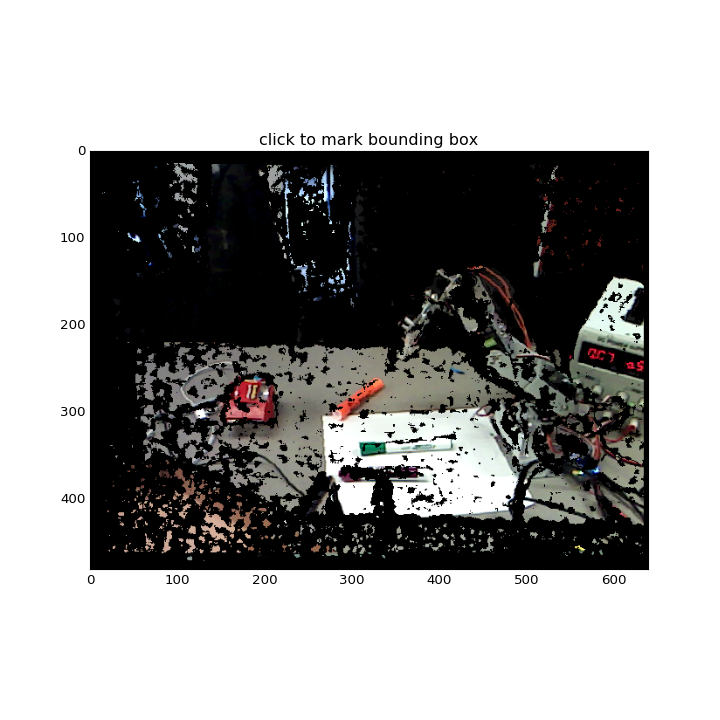

In [57]:
example.ParseFromString(pi.next())

iminfo = example.features.feature['iminfo']
col, pnt, cad = get_images(iminfo.bytes_list.value[0])
motor_pos = np.asarray( example.features.feature['motor_pos'].float_list.value )
fig, ax = plt.subplots(figsize=(9, 9))
ax.imshow(cad)
ax.set_title('click to mark bounding box')
linebuilder = LineBuilder(fig)



In [58]:
pos = pnt[int(round(linebuilder.y_0)) , int(round(linebuilder.x_0))]
results.append((motor_pos, pos))
print "added", pos, motor_pos





added [ 0.05440562 -0.0045782   0.77100003] [-0.52407217 -0.97193003  0.43279839 -0.3682681   0.        ]


In [ ]:
pnt[int(round(linebuilder.y_0)) , int(round(linebuilder.x_0))]